<a href="https://colab.research.google.com/github/SOPHIEMHANNA/DS1002-S24/blob/main/Assignments/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name   Sophie Hanna and Leila Bynum                 Computing ID Tkh6gg and Agj9cu

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [1]:
import pandas as pd

url = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"

# CSV file into dataframe
df = pd.read_csv(url)

# Printing first few rows of data frame
print(df.head())

  timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0  2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1  2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2  2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                
3  2022-12-28T00:00:00.000Z;"2022-12-28T23:59:59....                                
4  2022-12-27T00:00:00.000Z;"2022-12-27T23:59:59....                                


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [3]:
# displaying the number of rows and columns in the raw dataset.
num_rows, num_columns = df.shape
print("Number of rows in the raw dataset:", num_rows)
print("Number of columns in the raw dataset:", num_columns)

Number of rows in the raw dataset: 741
Number of columns in the raw dataset: 1


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [8]:
# Resolving any duplicate rows
df.drop_duplicates(inplace=True)

# Dropping the specified columns in the instructions above
columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Saving the cleaned DataFrame to a new CSV file
new_dataframe = "cleaned_ftx_data.csv"
df.to_csv(new_dataframe, index=False)

print("Cleaned data saved as:", new_dataframe)

Cleaned data saved as: cleaned_ftx_data.csv


Now display the first 10 rows of the cleaned dataset.

In [45]:
 # Loading cleaned file into a DataFrame
new_dataframe = pd.read_csv("cleaned_ftx_data.csv")

 # Displaying first 10 rows of the cleaned dataset
print(new_dataframe.head(10))

  timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0  2022-12-31T00:00:00.000Z;"2022-12-31T23:59:59....                                
1  2022-12-30T00:00:00.000Z;"2022-12-30T23:59:59....                                
2  2022-12-29T00:00:00.000Z;"2022-12-29T23:59:59....                                
3  2022-12-28T00:00:00.000Z;"2022-12-28T23:59:59....                                
4  2022-12-27T00:00:00.000Z;"2022-12-27T23:59:59....                                
5  2022-12-26T00:00:00.000Z;"2022-12-26T23:59:59....                                
6  2022-12-25T00:00:00.000Z;"2022-12-25T23:59:59....                                
7  2022-12-24T00:00:00.000Z;"2022-12-24T23:59:59....                                
8  2022-12-23T00:00:00.000Z;"2022-12-23T23:59:59....                                
9  2022-12-22T00:00:00.000Z;"2022-12-22T23:59:59....                                


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [48]:
import pandas as pd

df = pd.DataFrame(data)

# Converting timeOpen and timeClose to datetime objects for easier sorting
df['timeOpen'] = pd.to_datetime(df['timeOpen'])
df['timeClose'] = pd.to_datetime(df['timeClose'])

# Sorting the DataFrame by timeOpen in increasing order
df.sort_values(by='timeOpen', inplace=True)

# Calculating difference between all close prices of consecutive days
df['close_change'] = df['close'].diff()

print(df[['timeOpen', 'close', 'close_change']])

                   timeOpen  close  close_change
9 2022-12-22 00:00:00+00:00     93           NaN
8 2022-12-23 00:00:00+00:00     95           2.0
7 2022-12-24 00:00:00+00:00     97           2.0
6 2022-12-25 00:00:00+00:00     99           2.0
5 2022-12-26 00:00:00+00:00     96          -3.0
4 2022-12-27 00:00:00+00:00    100           4.0
3 2022-12-28 00:00:00+00:00    103           3.0
2 2022-12-29 00:00:00+00:00    106           3.0
1 2022-12-30 00:00:00+00:00    112           6.0
0 2022-12-31 00:00:00+00:00    103          -9.0


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [51]:
# Filtering any positive growth
positive_growth = df[df['close_change'] > 0]

# Sorting by close_change in decreasing order
positive_growth_sorted = positive_growth.sort_values(by='close_change', ascending=False)

# Select top 10 days of positive growth
top_10_positive_growth = positive_growth_sorted.head(10)

# Displaying results
print(top_10_positive_growth[['timeOpen', 'close_change']])

                   timeOpen  close_change
1 2022-12-30 00:00:00+00:00           6.0
4 2022-12-27 00:00:00+00:00           4.0
3 2022-12-28 00:00:00+00:00           3.0
2 2022-12-29 00:00:00+00:00           3.0
8 2022-12-23 00:00:00+00:00           2.0
7 2022-12-24 00:00:00+00:00           2.0
6 2022-12-25 00:00:00+00:00           2.0


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [53]:
# Creating new column "rate_of_change" based on "close_change"
df['rate_of_change'] = df['close_change'] / df['close'].shift(1)

# Displaying DataFrame with new column
print(df[['timeOpen', 'close_change', 'rate_of_change']])

                   timeOpen  close_change  rate_of_change
9 2022-12-22 00:00:00+00:00           NaN             NaN
8 2022-12-23 00:00:00+00:00           2.0        0.021505
7 2022-12-24 00:00:00+00:00           2.0        0.021053
6 2022-12-25 00:00:00+00:00           2.0        0.020619
5 2022-12-26 00:00:00+00:00          -3.0       -0.030303
4 2022-12-27 00:00:00+00:00           4.0        0.041667
3 2022-12-28 00:00:00+00:00           3.0        0.030000
2 2022-12-29 00:00:00+00:00           3.0        0.029126
1 2022-12-30 00:00:00+00:00           6.0        0.056604
0 2022-12-31 00:00:00+00:00          -9.0       -0.080357


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [58]:
# Filtering for any positive rate change
positive_rate_change = df[df['rate_of_change'] > 0]

# Sorting positive rate change by 'rate_of_change' in decreasing order and selecting top 5
top_5_days_positive_rate_change = positive_rate_change.sort_values(by='rate_of_change', ascending=False).head(5)

# Filtering for any negative rate change
negative_rate_change = df[df['rate_of_change'] < 0]

# Sorting negative rate change by 'rate_of_change' in increasing order and selecting top 5
top_5_days_negative_rate_change = negative_rate_change.sort_values(by='rate_of_change', ascending=True).head(5)

# Display the results
print("Top 5 days of greatest positive rate change in column:")
print(top_5_days_positive_rate_change[['timeOpen', 'rate_of_change']])

print("Top 5 days of greatest negative rate change in column:")
print(top_5_days_negative_rate_change[['timeOpen', 'rate_of_change']])

Top 5 days of greatest positive rate change in column:
                   timeOpen  rate_of_change
1 2022-12-30 00:00:00+00:00        0.056604
4 2022-12-27 00:00:00+00:00        0.041667
3 2022-12-28 00:00:00+00:00        0.030000
2 2022-12-29 00:00:00+00:00        0.029126
8 2022-12-23 00:00:00+00:00        0.021505
Top 5 days of greatest negative rate change in column:
                   timeOpen  rate_of_change
0 2022-12-31 00:00:00+00:00       -0.080357
5 2022-12-26 00:00:00+00:00       -0.030303


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

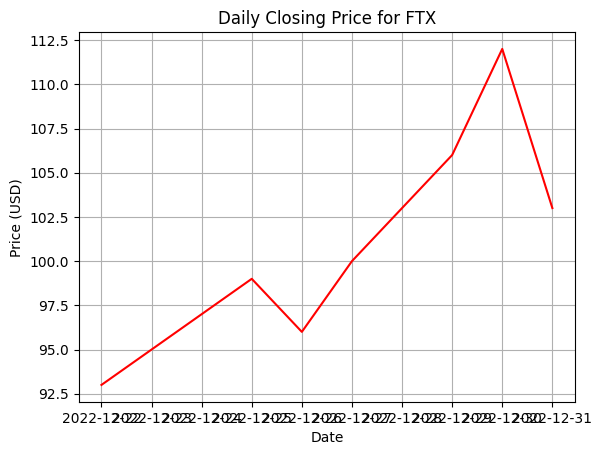

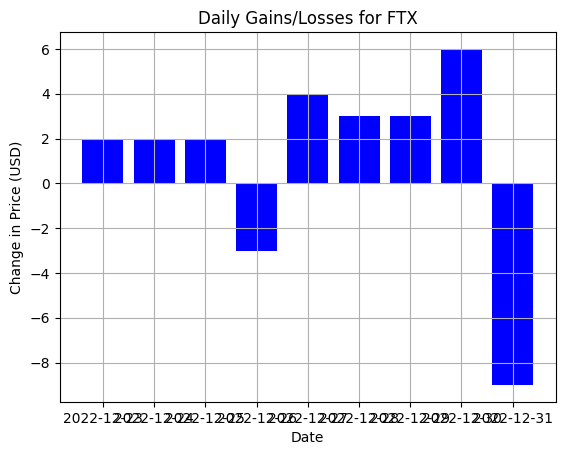

In [59]:
import matplotlib.pyplot as plt

# Plotting daily closing price
plt.plot(df['timeOpen'], df['close'], color='red')
plt.title('Daily Closing Price for FTX')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Plotting daily gains/losses
plt.bar(df['timeOpen'], df['close_change'], color='blue')
plt.title('Daily Gains/Losses for FTX')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.grid(True)
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

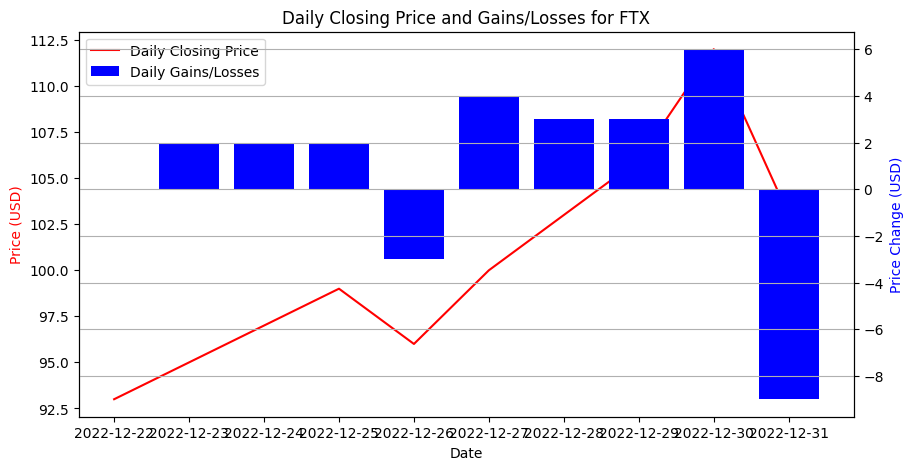

In [61]:
import matplotlib.pyplot as plt

# Creating figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting daily closing price on y-axis
ax1.plot(df['timeOpen'], df['close'], color='red', label='Daily Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='red')

# Creating y-axis for daily gains/losses
ax2 = ax1.twinx()
ax2.bar(df['timeOpen'], df['close_change'], color='blue', label='Daily Gains/Losses')
ax2.set_ylabel('Price Change (USD)', color='blue')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title('Daily Closing Price and Gains/Losses for FTX')
plt.grid(True)
plt.show()